# Goedaardig vs kwaadaardige tumoren met maar 2 regressoren (inputs)

We voorspellen of een tumor goedaardig (_benign_ of kortweg _B_) is, of de patiënt weldegelijk borstkanker heeft en de tumor dus kwaardaardig (_malignant_ of kortweg _M_) is, maar we gebruiken __maar 2 regressoren__, zodat we de data kunnen plotten.

In [16]:
import numpy as np
# data inladen
import pandas as pd
from pandas import read_csv
# data opsplitsen in trainings-, validatie- en testset
from sklearn.model_selection import train_test_split
# grafieken
from matplotlib import pyplot as plt
# nodig voor het maken van het svm model
from sklearn import svm
# nodig om accuraatheid van de voorspellingen te bekijken
from sklearn import metrics

In [17]:
# We laden de data
gegevens = read_csv("data.csv")

# We genereren een random random_state
random_state = np.random.randint(100)

# We verdelen de data in 50% training, 25% validatie en 25% test
tmp, testData = train_test_split(gegevens, test_size=0.25, random_state=random_state)
trainingData, validatieData = train_test_split(tmp, test_size=0.33, random_state=random_state)

# Print the shapes of the resulting datasets
print(f"Grootte training data: \t{trainingData.shape} (50%)")
print(f"Grootte validatie data: {validatieData.shape} (25%)")
print(f"Grootte test data: \t{testData.shape} (25%)")


Grootte training data: 	(285, 33) (50%)
Grootte validatie data: (141, 33) (25%)
Grootte test data: 	(143, 33) (25%)


In [18]:
print(trainingData.head())

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
85    8612399         M        18.46         18.52          121.10     1075.0   
370   9012315         M        16.35         23.29          109.00      840.4   
237    883263         M        20.48         21.46          132.50     1306.0   
445   9110720         B        11.99         24.89           77.61      441.3   
507  91544002         B        11.06         17.12           71.25      366.5   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
85           0.09874           0.10530         0.13350              0.08795   
370          0.09742           0.14970         0.18110              0.08773   
237          0.08355           0.08348         0.09042              0.06022   
445          0.10300           0.09218         0.05441              0.04274   
507          0.11940           0.10710         0.04063              0.04268   

     ...  texture_worst  perimeter_wor

In [19]:
# We tellen het aantal diagnoses in de training data
diagnosesTotaal = trainingData['diagnosis'].value_counts()

print(diagnosesTotaal)

aantalGoedaardig = diagnosesTotaal[0]
aantalKwaadaardig = diagnosesTotaal[1]

print(f"Er zijn {aantalGoedaardig} goedaardige tumoren en {aantalKwaadaardig} kwaadaardige tumoren in de training data.")

B    177
M    108
Name: diagnosis, dtype: int64
Er zijn 177 goedaardige tumoren en 108 kwaadaardige tumoren in de training data.


In [20]:
rand = np.random.randint(0,28)

# We selecteren de kolommen met de features (x-waarden)
trainingFeatures = trainingData.iloc[:,rand:rand+2]
validatieFeatures = validatieData.iloc[:,rand:rand+2]
testFeatures = testData.iloc[:,rand:rand+2]

# We selecteren de kolom met de diagnoses (y-waarden)
trainingDiagnoses = trainingData.iloc[:,1]
validatieDiagnoses = validatieData.iloc[:,1]
testDiagnoses = testData.iloc[:,1]

In [21]:
# We halen de namen op van de inputs die we onderzoeken
input1 = trainingFeatures.columns[0]
input2 = trainingFeatures.columns[1]

print(f"De twee inputs zijn {input1} en {input2}.")

De twee inputs zijn area_mean en smoothness_mean.


In [22]:
# we halen de waardes van de feautures op
trainingX = trainingFeatures.values
validatieX = validatieFeatures.values

In [23]:
# we halen de waardes van de diagnoses op
trainingY = trainingDiagnoses.values
validatieY = validatieDiagnoses.values

In [24]:
# Dit is de classifier of classificator
# We gebruiken de kernel trick om de data te kunnen scheiden
# In dit geval gebruiken we een lineaire kernel
clf = svm.SVC(kernel='linear')

# We trainen de classifier met de training data
clf.fit(trainingX,trainingY)

# We voorspellen de diagnoses van de validatie data
validatieVoorspellingen = clf.predict(validatieX)

In [25]:
# we berekenen de accuraatheid van de voorspellingen
accuraatheid = metrics.accuracy_score(validatieY, validatieVoorspellingen)
print(f"De accuraatheid van de voorspellingen is {accuraatheid*100:.2f}%")

De accuraatheid van de voorspellingen is 87.23%


### Validatiegegevens gebruiken om de 3 meta-parameters te bepalen.

#### C-term<br>
De C-term staat voor de __foutentoleratie__ van het model.<br><br>
*Kleine waarden voor C:* <br>
Wanneer C klein is, laat het model meer fouten toe, waardoor de beslissingsgrens eenvoudiger wordt.<br><br>
*Grote waarden voor C:* <br>
Wanneer C groot is, laat het model een laag aantal fouten toe, waardoor de beslissingsgrens complexer wordt.<br>

In [26]:
# De C-term is een metaparameter en staat voor de foutentoleratie van het model.
mogelijkeCs = [c/10 for c in range(1, 100)]

hoogsteAccuraatheid = 0
cOpt = 0

# Overloop verschillende waarden voor C
for Ci in mogelijkeCs:

    clf = svm.SVC(kernel='linear', C=Ci)

    clf.fit(trainingX, trainingY)
    validatieVoorspellingen = clf.predict(validatieX)
    accuraatheid = metrics.accuracy_score(validatieY, validatieVoorspellingen)

    print(f"De accuraatheid van de voorspellingen op de validatiedata is {accuraatheid*100:.5f}% met C={Ci}")

    if accuraatheid > hoogsteAccuraatheid:
        hoogsteAccuraatheid = accuraatheid
        cOpt = Ci

print(f"\nDe optimale waarde voor C is {cOpt} met een accuraatheid van {hoogsteAccuraatheid*100:.2f}%")

De accuraatheid van de voorspellingen op de validatiedata is 86.52482% met C=0.1
De accuraatheid van de voorspellingen op de validatiedata is 86.52482% met C=0.2
De accuraatheid van de voorspellingen op de validatiedata is 85.81560% met C=0.3
De accuraatheid van de voorspellingen op de validatiedata is 86.52482% met C=0.4
De accuraatheid van de voorspellingen op de validatiedata is 86.52482% met C=0.5
De accuraatheid van de voorspellingen op de validatiedata is 86.52482% met C=0.6
De accuraatheid van de voorspellingen op de validatiedata is 86.52482% met C=0.7
De accuraatheid van de voorspellingen op de validatiedata is 86.52482% met C=0.8
De accuraatheid van de voorspellingen op de validatiedata is 87.23404% met C=0.9
De accuraatheid van de voorspellingen op de validatiedata is 87.23404% met C=1.0
De accuraatheid van de voorspellingen op de validatiedata is 87.23404% met C=1.1
De accuraatheid van de voorspellingen op de validatiedata is 87.23404% met C=1.2
De accuraatheid van de voors

KeyboardInterrupt: 

#### Kernel<br>
De kernel zegt het model welke 'trick' het het moet gebruiken om de data te scheiden.

In [ ]:
# De kernel zegt het model welke 'trick' het het moet gebruiken om de data te scheiden.
mogelijkeKernels = ['linear', 'poly', 'rbf', 'sigmoid']

optKernel = ""
hoogsteAccuraatheid = 0

for kernel in mogelijkeKernels:

    clf = svm.SVC(kernel=kernel, C=cOpt)
    clf.fit(trainingX, trainingY)
    validatieVoorspellingen = clf.predict(validatieX)
    accuraatheid = metrics.accuracy_score(validatieY, validatieVoorspellingen)

    print(f"De accuraatheid van de voorspellingen op de validatiedata is {accuraatheid*100:.5f}% met de kernel '{kernel}' en C={cOpt}")

    if accuraatheid > hoogsteAccuraatheid:
        hoogsteAccuraatheid = accuraatheid
        optKernel = kernel

print(f"\nDe optimale kernel is '{optKernel}' met een accuraatheid van {hoogsteAccuraatheid*100:.2f}% voor C={cOpt}")

De accuraatheid van de voorspellingen op de validatiedata is 57.44681% met de kernel 'linear' en C=0.1
De accuraatheid van de voorspellingen op de validatiedata is 57.44681% met de kernel 'poly' en C=0.1
De accuraatheid van de voorspellingen op de validatiedata is 57.44681% met de kernel 'rbf' en C=0.1
De accuraatheid van de voorspellingen op de validatiedata is 57.44681% met de kernel 'sigmoid' en C=0.1

De optimale kernel is 'linear' met een accuraatheid van 57.45% voor C=0.1


### Toepassen de data

In [ ]:
clf = svm.SVC(kernel=optKernel, C=cOpt)
clf.fit(trainingX, trainingY)
voorspelling = clf.predict(trainingX)
# accuraatheid = metrics.accuracy_score(testY, testVoorspellingen)

# print(f"De accuraatheid van de voorspellingen op de testdata is {accuraatheid*100:.2f}% voor de kernel '{optKernel}', C={cOpt}")

### Visuele voorstelling


De optimale kernel is 'linear' met een accuraatheid van 57.45% voor C=0.1


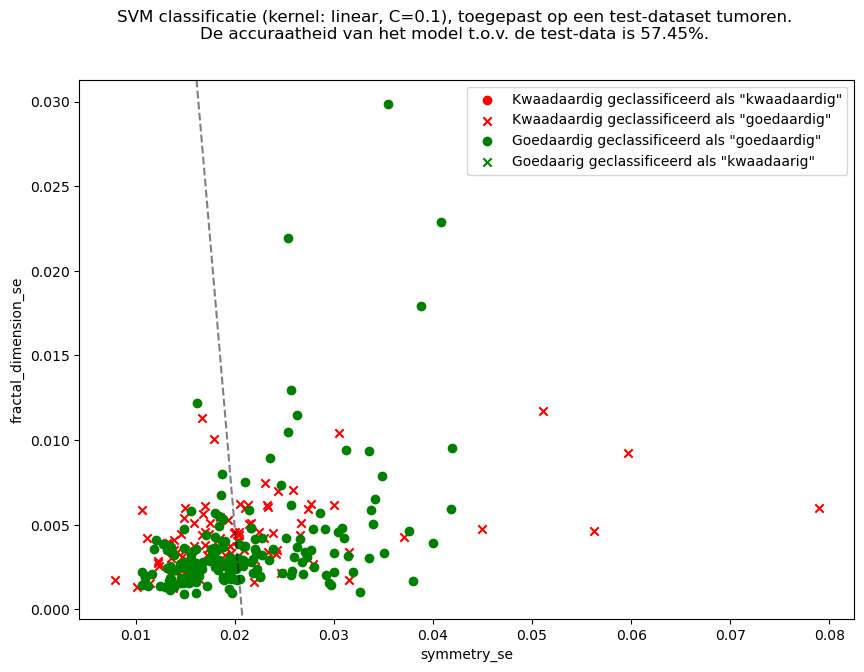

In [ ]:
import matplotlib.pyplot as plt

print(f"\nDe optimale kernel is '{optKernel}' met een accuraatheid van {hoogsteAccuraatheid*100:.2f}% voor C={cOpt}")

# Punten die geclassificeerd worden als goedaardig maar kwaadaardig zijn
falsePositives = np.where((voorspelling == 'B') & (trainingY == 'M'))
# Punten die geclassificeerd worden als goedaardig en ook goedaardig zijn
truePositives = np.where((voorspelling == 'B') & (trainingY == 'B'))
# Punten die geclassificeerd worden als kwaadaardig maar goedaardig zijn
falseNegatives = np.where((voorspelling == 'M') & (trainingY == 'B'))
# Punten die geclassificeerd worden als kwaadaardig en ook kwaadaardig zijn
trueNegatives = np.where((voorspelling == 'M') & (trainingY == 'M'))

plt.figure(figsize=(10, 7))
plt.suptitle(f"SVM classificatie (kernel: {optKernel}, C={cOpt}), toegepast op een test-dataset tumoren.\nDe accuraatheid van het model t.o.v. de test-data is {accuraatheid*100:.2f}%.")
plt.scatter(trainingX[trueNegatives, 0], trainingX[trueNegatives, 1], c='r', marker='o', label='Kwaadaardig geclassificeerd als "kwaadaardig"')
plt.scatter(trainingX[falsePositives, 0], trainingX[falsePositives, 1], c='r', marker='x', label='Kwaadaardig geclassificeerd als "goedaardig"')
plt.scatter(trainingX[truePositives, 0], trainingX[truePositives, 1], c='g', marker='o', label='Goedaardig geclassificeerd als "goedaardig"')
plt.scatter(trainingX[falseNegatives, 0], trainingX[falseNegatives, 1], c='g', marker='x', label='Goedaarig geclassificeerd als "kwaadaarig"')

# Beslissingslijn plotten
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.xlabel(input1)
plt.ylabel(input2)
plt.legend()
plt.savefig('svm-classificatie-2-inputs.pdf')
plt.show()

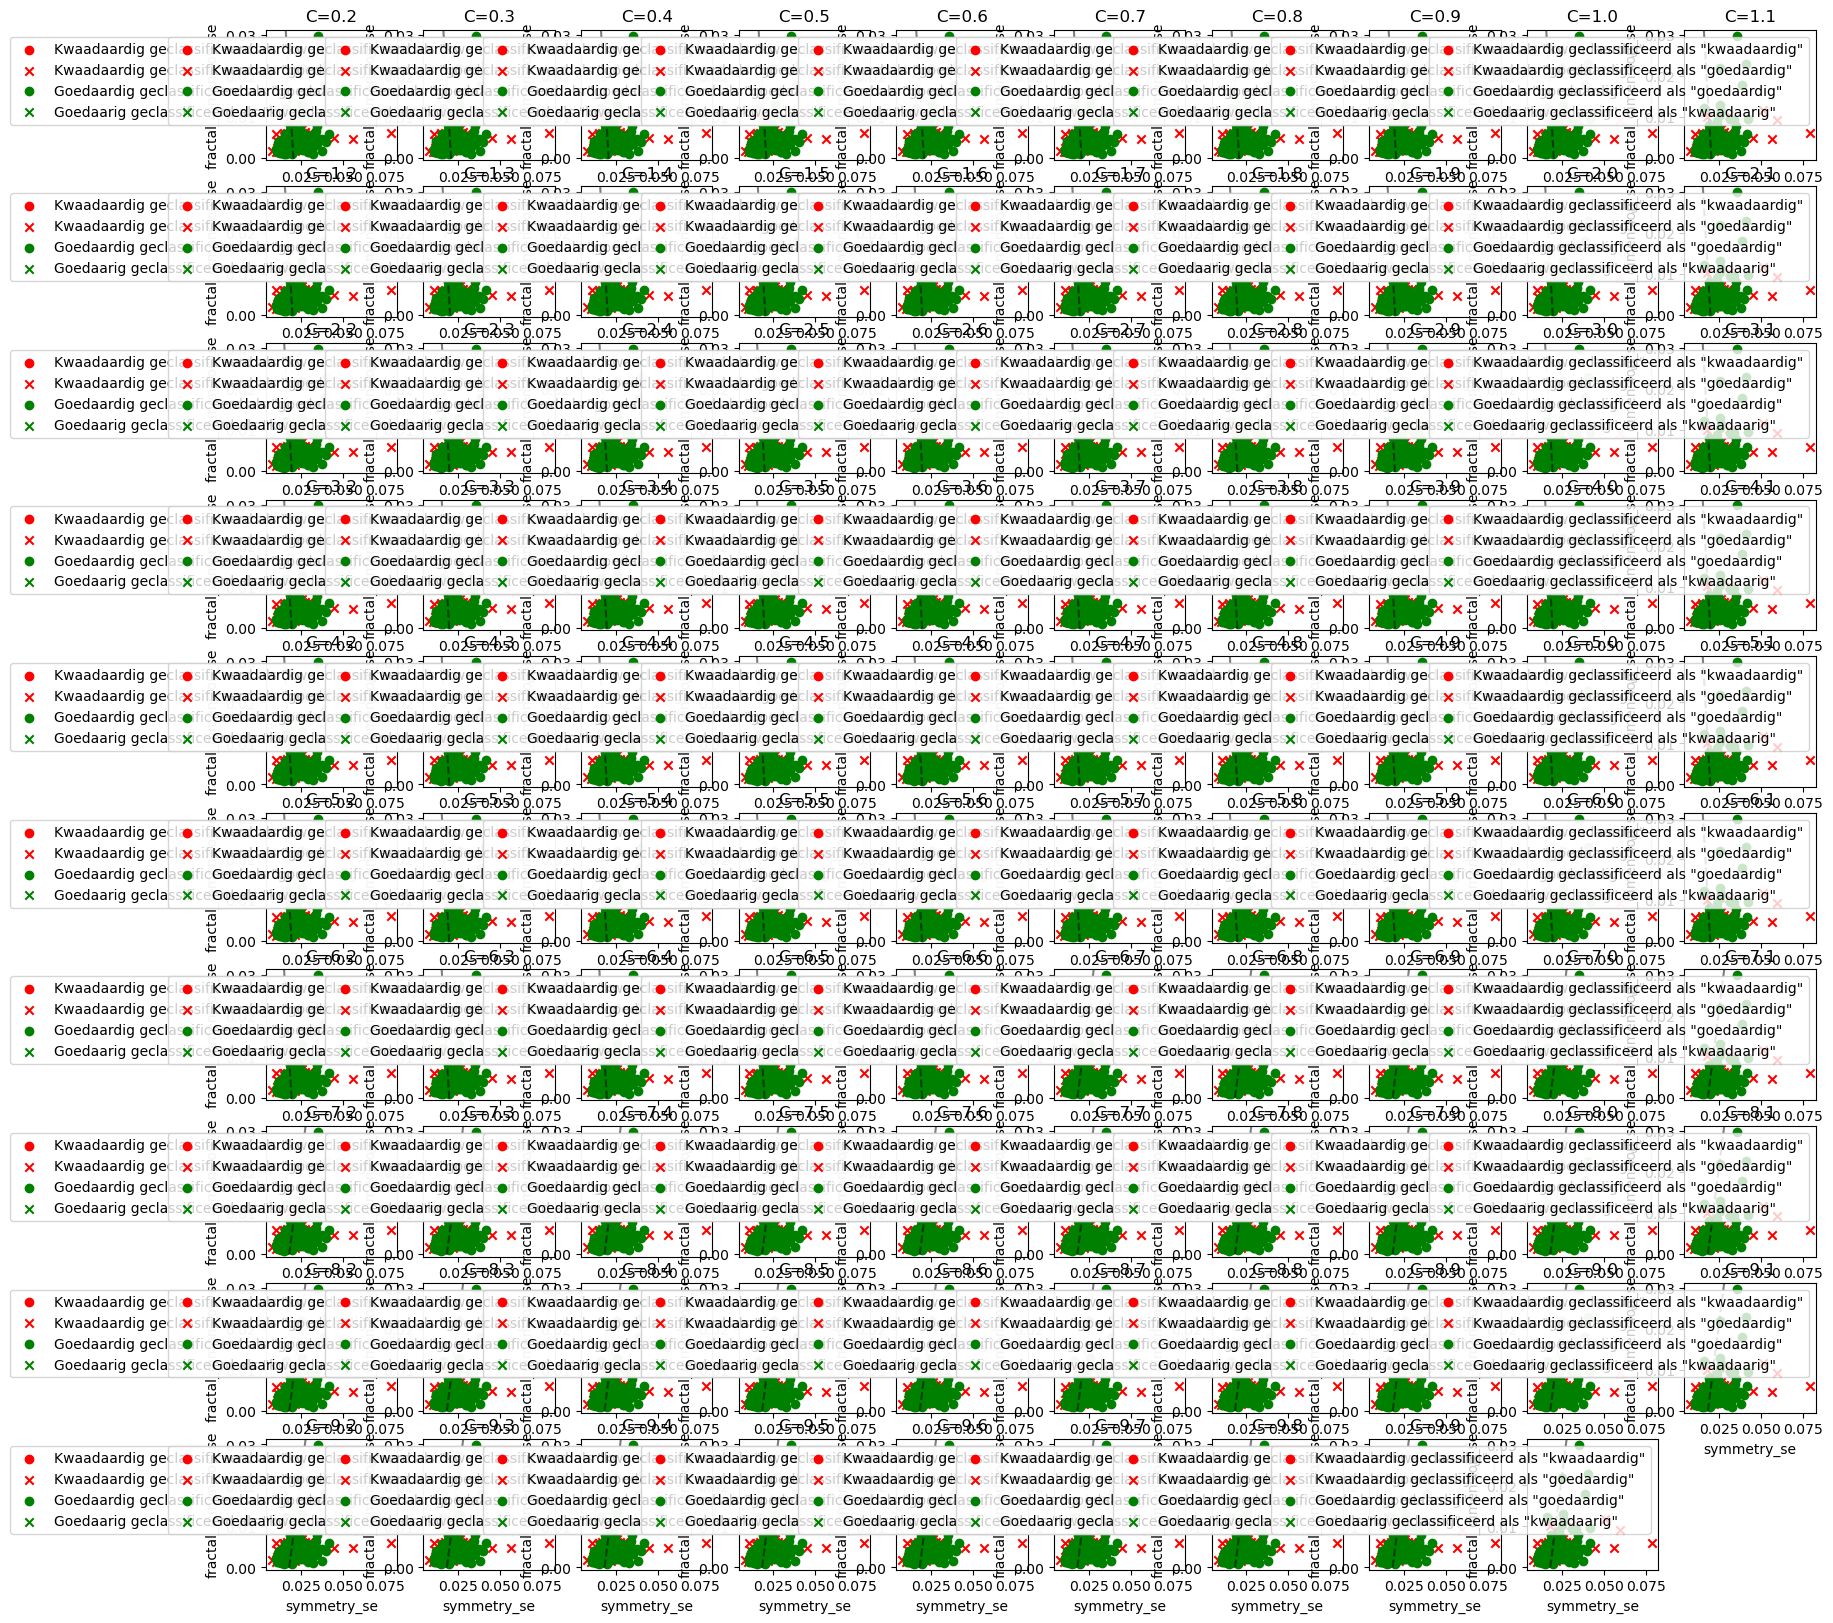

In [ ]:
import matplotlib.pyplot as plt

# Punten die geclassificeerd worden als goedaardig maar kwaadaardig zijn
falsePositives = np.where((voorspelling == 'B') & (trainingY == 'M'))
# Punten die geclassificeerd worden als goedaardig en ook goedaardig zijn
truePositives = np.where((voorspelling == 'B') & (trainingY == 'B'))
# Punten die geclassificeerd worden als kwaadaardig maar goedaardig zijn
falseNegatives = np.where((voorspelling == 'M') & (trainingY == 'B'))
# Punten die geclassificeerd worden als kwaadaardig en ook kwaadaardig zijn
trueNegatives = np.where((voorspelling == 'M') & (trainingY == 'M'))

plt.figure(figsize=(20, 20))

# De C-term is een metaparameter en staat voor de foutentoleratie van het model.
mogelijkeCs = [c/10 for c in range(1, 100)]

# Overloop verschillende waarden voor C
for i,Ci in enumerate(mogelijkeCs):

    clf = svm.SVC(kernel='linear', C=Ci)
    clf.fit(trainingX, trainingY)

    ax1 = plt.subplot(10, 10, i+1)

    ax1.scatter(trainingX[trueNegatives, 0], trainingX[trueNegatives, 1], c='r', marker='o', label='Kwaadaardig geclassificeerd als "kwaadaardig"')
    ax1.scatter(trainingX[falsePositives, 0], trainingX[falsePositives, 1], c='r', marker='x', label='Kwaadaardig geclassificeerd als "goedaardig"')
    ax1.scatter(trainingX[truePositives, 0], trainingX[truePositives, 1], c='g', marker='o', label='Goedaardig geclassificeerd als "goedaardig"')
    ax1.scatter(trainingX[falseNegatives, 0], trainingX[falseNegatives, 1], c='g', marker='x', label='Goedaarig geclassificeerd als "kwaadaarig"')

    ax.set_title(f"C={Ci:.1f}")

    # Beslissingslijn plotten
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax1.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    ax1.set_xlabel(input1)
    ax1.set_ylabel(input2)
    ax1.legend()

plt.show()